In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d=pd.read_excel("data.xlsx")
d

,Tk,p,dP,sigP,r,sr,sigm,ssigm
0,19.0,191,232.327127,0.014555,0.000507,0.02,0.058931,0.024736
1,19.0,191,232.327127,0.014555,0.000507,0.02,0.058931,0.024736
2,26.0,191,232.327127,0.014555,0.000507,0.02,0.058931,0.024736
3,26.0,190,230.374798,0.014678,0.000507,0.02,0.058436,0.024808
4,26.0,191,232.327127,0.014555,0.000507,0.02,0.058931,0.024736
5,29.5,191,232.327127,0.014555,0.000507,0.02,0.058931,0.024736
6,29.5,190,230.374798,0.014678,0.000507,0.02,0.058436,0.024808
7,29.5,190,230.374798,0.014678,0.000507,0.02,0.058436,0.024808
8,34.5,190,230.374798,0.014678,0.000507,0.02,0.058436,0.024808
9,34.5,190,230.374798,0.014678,0.000507,0.02,0.058436,0.024808


In [3]:
def getkb(X,Y):
    k=(np.average(Y*X)-np.average(Y)*np.average(X))/(np.average(X*X)-np.average(X)**2)
    b=np.average(Y)-k*np.average(X)
    def av(n):
        return np.average(n)
    sigk=np.sqrt(np.abs((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k))/np.sqrt(X.shape[0])
    #print((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k)
    sigb=sigk*np.sqrt(av(X*X)-av(X)**2)
    return k,b,sigk,sigb

In [4]:
st=sorted(list(set(d.Tk)))
T=np.zeros(len(st))
sigm=np.zeros(len(st))
ssigm=np.zeros(len(st))
k=0
for Tt in st:
    T[k]=np.average(d[d.Tk==Tt].Tk)+273
    sigm[k]=np.average(d[d.Tk==Tt].sigm)
    ssigm[k]=np.average(d[d.Tk==Tt].ssigm)
    k+=1
sigm*=1000
a,b,sa,sb=getkb(T,sigm)
print(a,b,sa,sb)
dsigmdT=np.ones(sigm.shape)*a#np.gradient(sigm,T,edge_order=2)
T=T
sigm=sigm
dsigmdT=dsigmdT
dsigmdT

-0.06988708739866528 79.68766614718265 0.006919912643531898 0.08773864939825375


array([-0.06988709, -0.06988709, -0.06988709, -0.06988709, -0.06988709,
       -0.06988709, -0.06988709, -0.06988709, -0.06988709])

In [5]:
sigm

array([58.93086957, 58.7657971 , 58.60072464, 58.27057971, 58.10550725,
       57.77536232, 57.44521739, 56.78492754, 55.95956522])

In [6]:
-T*dsigmdT

array([20.40702952, 20.89623913, 21.14084394, 21.49027938, 21.8327261 ,
       22.18216154, 22.52460827, 22.87404371, 23.20251302])

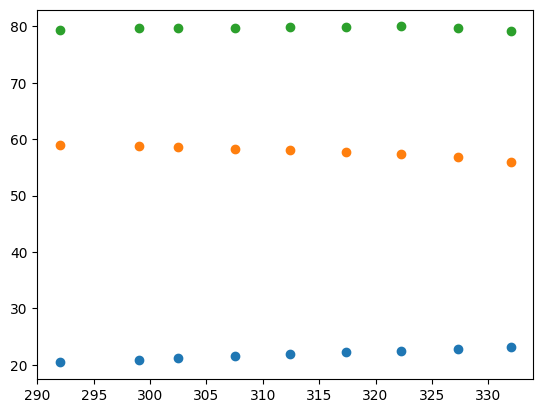

In [7]:
plt.scatter(T,-T*dsigmdT)
plt.scatter(T,sigm)
plt.scatter(T,sigm-T*dsigmdT)

In [8]:
sigm-T*dsigmdT

array([79.33789909, 79.66203623, 79.74156858, 79.76085909, 79.93823335,
       79.95752386, 79.96982566, 79.65897124, 79.16207823])

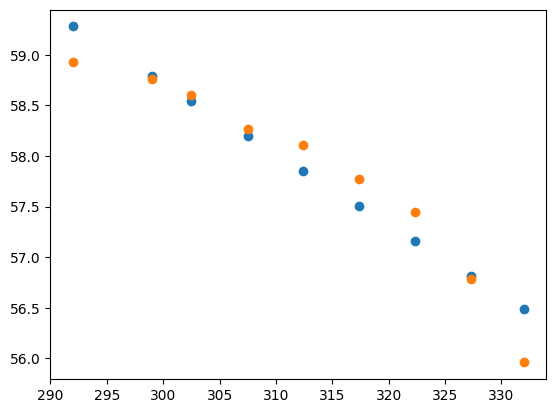

In [9]:
plt.scatter(T,b+T*a)
plt.scatter(T,sigm)

In [10]:
UF=np.average(sigm-T*dsigmdT)

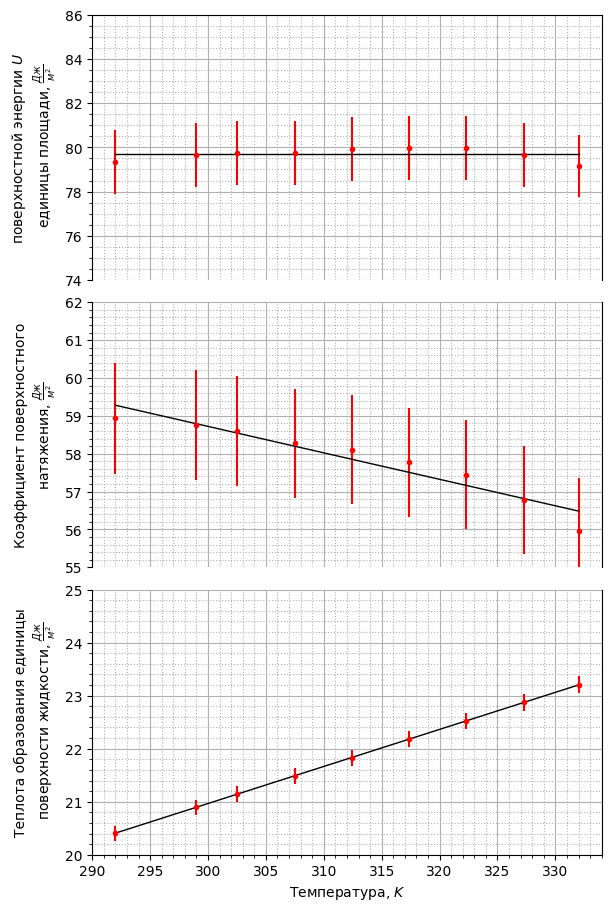

In [11]:
fig,ax=plt.subplots(3,1,figsize=(6,9),constrained_layout=True)

ax[2].errorbar(T,-T*dsigmdT,fmt='.r',yerr=np.abs(sa*T*dsigmdT))
ax[2].plot(T,-T*dsigmdT, 'black', linewidth=1)
ax[2].set_ylim([20,25])
ax[2].spines['top'].set_visible(False)
ax[2].set_xlabel("Температура, $K$")
ax[2].set_ylabel("Теплота образования единицы\n "+r"поверхности жидкости, $\frac{Дж}{м^2}$")

ax[1].errorbar(T,sigm,fmt='.r',yerr=ssigm*sigm)
ax[1].plot(T,a*T+b, 'black', linewidth=1)
ax[1].set_ylim([55,62])
#ax[1].get_xaxis().set_visible(False)
ax[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].set_ylabel("Коэффициент поверхностного\n"+r"натяжения, $\frac{Дж}{м^2}$")

ax[0].errorbar(T,sigm-T*dsigmdT,fmt='.r', yerr=np.sqrt(np.abs(sa*T*dsigmdT)**2+(ssigm*sigm)**2))
ax[0].plot([T[0],T[-1]],[UF,UF], 'black', linewidth=1)
ax[0].set_ylim([74,86])
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
ax[0].spines['bottom'].set_visible(False)
ax[0].set_ylabel("поверхностной энергии $U$\n "+r"единицы площади, $\frac{Дж}{м^2}$")


for axs in ax:
    axs.minorticks_on()
    axs.grid(which='major')
    axs.grid(which='minor', linestyle=':')

fig.savefig("res.eps")

In [12]:
np.average(sigm-T*dsigmdT),np.average(np.sqrt(np.abs(sa*T*dsigmdT)**2+(ssigm*sigm)**2))/79.68

(np.float64(79.68766614718265), np.float64(0.018175491455081478))